# Project Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above. 2.Identify customer segments from given data and categorize customer into one of the segments. 3.If customer is not eligible for the input required amount and duration:

3.1 What can be amount for the given duration. 3.2 If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

# Read data set

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd 
A = pd.read_csv("/Users/ABC/Downloads/loan/training_set.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# missing data tratment

In [4]:
A.isna().sum() #Findout missing value in dataset

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from PM8wd import replacer
replacer(A)

In [6]:
#A.isna().sum()

In [7]:
#A.shape

# EDA

Ycat,Xcon --> ANOVA

Ycat,Xcat --> chisquare

# define X and Y 

In [8]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)




# divide data in con and cat

In [9]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
    
    

In [10]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [11]:
from PM8 import ANOVA,chisquare

for i in con:
    print("----","Loan_Status vs",i)
    print(ANOVA(A,"Loan_Status",i))

---- Loan_Status vs ApplicantIncome
0.903
---- Loan_Status vs CoapplicantIncome
0.142
---- Loan_Status vs LoanAmount
0.368
---- Loan_Status vs Loan_Amount_Term
0.604
---- Loan_Status vs Credit_History
0.0


In [12]:
from PM8 import chisquare

for i in cat:
    print("----","Loan_Status vs",i)
    print(chisquare(A,"Loan_Status",i))

---- Loan_Status vs Gender
0.7391461310869638
---- Loan_Status vs Married
0.029608580862582116
---- Loan_Status vs Dependents
0.3688663081366005
---- Loan_Status vs Education
0.04309962129357355
---- Loan_Status vs Self_Employed
0.9710746411403309
---- Loan_Status vs Property_Area
0.0021360187811644915


# Outlier

In [13]:
# standardise the data values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X[con])
X1 = pd.DataFrame(ss.transform(X[con]),columns=con)

In [14]:
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164
3,-0.462412,0.252103,-0.314547,0.279851,0.45164
4,0.097389,-0.554368,-0.064454,0.279851,0.45164


In [15]:
from PM8wd import outliers
ol = outliers(X1)

In [16]:
#ol

In [17]:
X = X.drop(index=ol,axis=0)
Y = Y.drop(index=ol,axis=0)

In [18]:
#X

In [19]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])


# Preprocessing

In [20]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [21]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.449438,-0.860843,0.088189,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,-1.158587,0.239408,0.456461,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
573,-0.189741,-0.860843,-1.710730,-3.237229,0.456461,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
574,1.148688,-0.715392,2.083030,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
575,0.983662,-0.860843,0.907499,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [22]:
#Split Data into Training & Testing set and Create model

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [23]:
tr_acc

0.8134490238611713

In [24]:
ts_acc

0.8362068965517241

In [25]:
Xnew.shape

(577, 20)

# Tree model

In [26]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [27]:
xnew = preprocessing(X)

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,Y,test_size=0.2,random_state=21)

In [29]:
xnew.shape

(577, 9)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(pred_tr,ytrain)
ts_acc = accuracy_score(pred_ts,ytest)

In [31]:
tr_acc

0.8134490238611713

In [32]:
ts_acc

0.8362068965517241

In [33]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(pred_tr,ytrain)
ts_acc = accuracy_score(pred_ts,ytest)

In [34]:
tr_acc

0.8134490238611713

In [35]:
ts_acc

0.8448275862068966

# Gridsearch CV

In [36]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [37]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)

In [38]:
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [39]:
rfc = RandomForestClassifier(criterion='gini', max_depth=2, n_estimators= 20,random_state=21)

In [40]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [41]:
tr_acc

0.8112798264642083

In [42]:
ts_acc

0.8448275862068966

# Getting Data ready for predictions

In [43]:
B = pd.read_csv("E:/D0wnloded/Microsoft.SkypeApp_kzf8qxf38zg5c!App/All/testing_set (2).csv")

In [44]:
B.shape

(367, 12)

In [45]:
B1 = B[X.columns].head()

In [46]:
B1.shape

(5, 5)

# Missing Data treatment

In [47]:
B1.isna().sum()

Credit_History       1
CoapplicantIncome    0
Property_Area        0
Education            0
Married              0
dtype: int64

In [48]:
replacer(B)

In [49]:
cat = []
con = []
for i in B.columns:
    if (B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [50]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [51]:
ready_for_pred = Bnew[xnew.columns]

In [52]:
#ready_for_pred.shape

In [53]:
#Bnew.shape

In [54]:
predicted_final = model.predict(ready_for_pred)

In [55]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T

In [56]:
E.columns = ["Load_ID","Loan_Status"]

In [57]:
E.head(5)

,Load_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

In [58]:
B['Loan_Status'] = predicted_final

In [59]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [60]:
xtest = B[B.Loan_Status == "N"]

In [61]:
#xtest

In [62]:
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [63]:
xtest_1.index = range(0,xtest_1.shape[0])

# Create training data based on above predictors

In [64]:
Q = A[xtest_1.columns]

In [65]:
Q['LS']= A.Loan_Status

In [66]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=["LS"],axis=1)

In [67]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [68]:
Q.index = range(0,Q.shape[0])

# Preprocessing

In [69]:
from PM8wd import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [70]:
ytrain = R.LoanAmount

# regression model

In [71]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [72]:
pred.shape

(59,)

In [73]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [74]:
act.index = range(0,59)

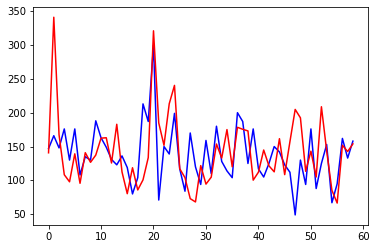

In [75]:
import matplotlib.pyplot as plt
plt.plot(act,c="blue")
plt.plot(pred,c="red")

# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [76]:
B['Duration']=B.Loan_Amount_Term/12

In [77]:
data_for_pred = B[(B.Duration<=20)&(B.Loan_Status=="Y")]
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [78]:
data_for_pred_final.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


# Prepare training data

In [79]:
T = A[A.Loan_Status == "Y"]
T1 = T[data_for_pred_final.columns]
T1.index = range(0,T1.shape[0])

In [80]:
xtrain = preprocessing(T1)

In [81]:
ytrain = T[["Loan_Amount_Term"]]

In [82]:
ytrain.index = range(0,ytrain.shape[0])

In [83]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [84]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [85]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

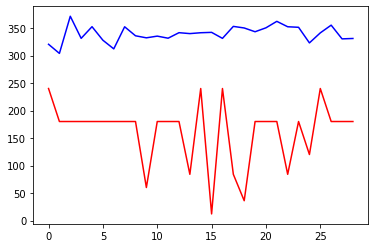

In [86]:
plt.plot(U,c="red")
plt.plot(pred,c="blue")

In [87]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,180.0
9,60.0
